<figure>
  <IMG SRC="img/logo_ufaz.png" WIDTH=100 ALIGN="right">
</figure>

# Lab 4 : Convolution and low-pass filter
*Signal Processing in Geosciences / C. Jodry / Oct. 2020* 

---------

In this lab we'll see in practice :
* the convolution of 2 functions
* the fact that convolving a function by a window function is equivalent to a low pass filter

In [19]:
import numpy as np
from scipy import signal
from numpy import fft
import matplotlib.pyplot as plt
% matplotlib inline

*NB : All the main functions to perform signal processing (like filtering) are available in the `scipy.signal` module*

# 1. Convolution

## 1.1 Convolution of two stem signals

The following code allows you to play with the convolution of 2 stem vectors : $f$ and $g$.

In python the convolution of two vectors can be performed with `np.convolve`. 

Have a look to the help (with the `?` character) of this function to see how it works and the various options.

> Then do :
* Define 2 vectors $f$ and $g$
* Do their convolution product and save the result in a vector $h$
* Represent functions $f$, $g$ and $h$
* Use a Dirac and then window function for $g$ and see how it modify $f$


In [30]:
#f = [1,2,3]
f = [1,2,3,4,5,6,7,8,9,10]
#g = [2,3,4]
#g = [1,0,0] # Dirac doens't change the function
g = [0,0,0,0.1,0.1,0.1,0.1,0,0,0] # shifted Dirac doens't change amplitude of the function but shift it in time

c = np.convolve(f,g)

N = len(f)
t = np.arange(0,N)

N_conv = len(c)
t_conv = np.arange(0,N_conv)

(-10, 20)

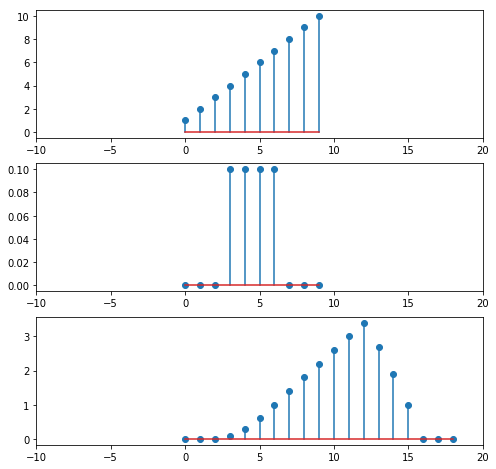

In [32]:
plt.figure(figsize=(8,8))
plt.subplot(311)
plt.stem(t,f)
plt.xlim(-N,N*2)
plt.subplot(312)
plt.stem(t,g)
plt.xlim(-N,N*2)
plt.subplot(313)
plt.stem(t_conv,c)
plt.xlim(-N,N*2)

(-6, 12)

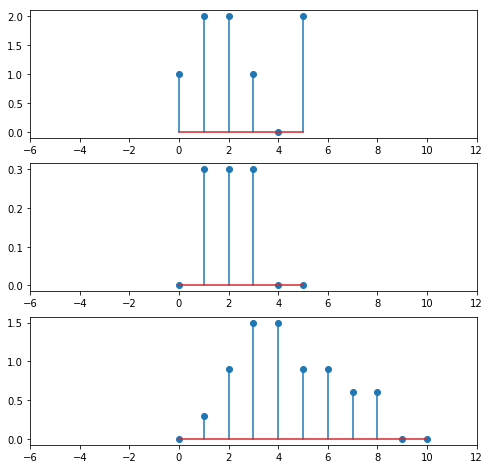

In [33]:
# Other exemple with random function

f = np.array([1,2,2,1,0,2])
g = np.array([0,0.3,0.3,0.3,0,0]) # window function less than 1 = to low pass filter
c = np.convolve(f,g)

N = len(f)
t = np.arange(0,N)

N_conv = len(c)
t_conv = np.arange(0,N_conv)

plt.figure(figsize=(8,8))
plt.subplot(311)
plt.stem(t,f)
plt.xlim(-N,N*2)
plt.subplot(312)
plt.stem(t,g)
plt.xlim(-N,N*2)
plt.subplot(313)
plt.stem(t_conv,c)
plt.xlim(-N,N*2)

Note that convolve function length is (N+M-1)

## 1.2 Convolution of two vectors

The following code allows you to play with the convolution of 2 vectors : $u1$ and $u2$.

> To do :
* Define $u1$ as an array of zeros with $N = 100$. And when $N=25$ and $N=40$,  $u1 = 1$; for $N=60$, $u1 = 1.5$; and for $N=80$,  $u1 = -1$
* Define $u2 = [0,0,0,5,5,5,5,4,3,2,1,0]$ (function with a trapezoid shape)
* Do their convolution product and save the result in a vector $s$
* Represent functions $f$, $g$ and $h$. Interpret the results
* Repeat with a modified $u1$ where $N=35$, $u1=1$; for $N=63$, $u1=-0.5$; and for $N=70$, $u1=-1$. What happens if u1 signal has non-zero for nearby locations ?

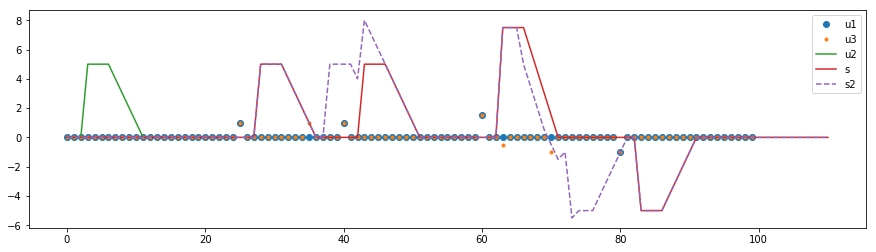

In [34]:
N = 100

# define u1
u1 = np.zeros(N)
u1[25] = 1
u1[40] = 1
u1[60] = 1.5
u1[80] = -1

# define u3
u3 = np.zeros(N)
u3[25] = 1
u3[40] = 1
u3[60] = 1.5
u3[80] = -1
u3[35] = 1
u3[63] = -0.5
u3[70] = -1

# define u2
u2=[0,0,0,5,5,5,5,4,3,2,1,0]

# convolve u1 and u2
s = np.convolve(u1,u2)
s1 = np.convolve(u3,u2)

# figure
plt.figure(figsize=(15,4))
plt.plot(u1,'o',label='u1')
plt.plot(u3,'.',label='u3')
plt.plot(u2,label='u2')
plt.plot(s,label='s')
plt.plot(s1,'--',label='s2')
plt.legend()

1. When convolve with u1, the signal u2 is copied wherever u1 is non-zero. The amplitude of the recopying depends on the value of u1. In particular, if u1 is negative, u2 is copied downwards (negatively).

2. We make a new signal u3 which is u1 but with non-zero location closer. In this case, the copied signals overlap and thus are added (or subtracted) and the result of the convolution is harder to interpret visually.

# 2. Filtering data

## 2.1 Analysis of a seismogram

The file `mayotte_1hour.txt` contains 1 hour of raw seismic signal recorded by a seismometer on the island of Mayotte.
It is a text file but with few *meta-data* information at the beginning including the time step.

> To do :
* Import this timeseries with `np.loadtxt` using the `skiprows` option of this function
* Plot the timeseries
* Compute it's Fourier transform and plot the amplitude spectrum (with a log x-axis using `plt.semilogx`)
* Make a quick analysis of this spectrogram

In [ ]:
# load data
data = np.loadtxt("Data/mayotte_1hour.txt", skiprows = 8)
data = data-np.mean(data)

Text(0.5,0,'frequency (Hz)')

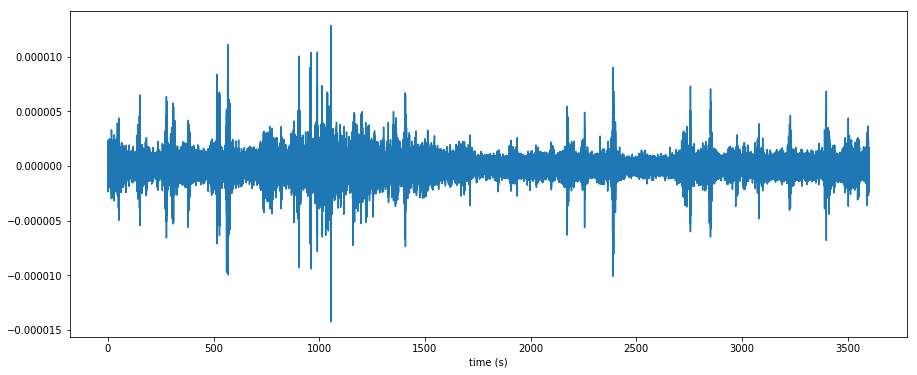

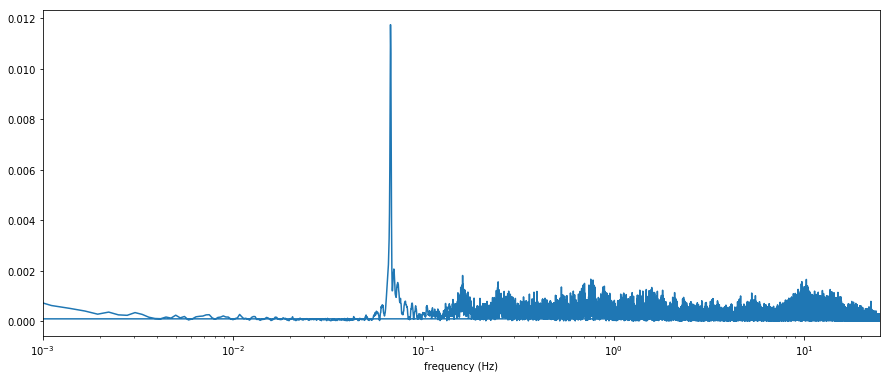

In [49]:
# Define parameters
dt = 0.02 # time step given in the meta-data information (name delta in the file)
N = len(data) # Number of points
t = np.arange(0, N) * dt  # The time vector/sequence

# Fourier transform
data_fft = fft.fft(data) # The Fourier transform
f = fft.fftfreq(N, dt) # The corresponding frequency vector

# plotting
plt.figure(figsize = (15, 6))
plt.plot(t, data)
#plt.xlim(0,500)
#plt.ylim(0.000005,-0.000005)
plt.xlabel("time (s)")

plt.figure(figsize = (15,6))
plt.semilogx(f, np.abs(data_fft))
plt.xlim((0.001,1./(2*dt)))
plt.xlabel("frequency (Hz)")

Analysis of the data:
- The timeserie shows some background noise that oscillate between $2.10^{-6}$ and $-2.10^{6}$ of amplitude with some spikes of higher amplitudes randomly distributed over time. From $800s$ to $1500s$ aprox., the mean amplitude of the recording increase and presents events of higher amplitude close to each other. This migth be interpredted as some kind of seismic event.

- The spectrogram show a high amplitude spike at $0.8Hz$ approx. Lower frequencies are empty but higher frequencies show some low amplitudes spikes that appear random and can be associated the background seismic noise. The high amplitude spike migth be a seismic event of some kind.

- Considering the two graphs together, the event at $0.8Hz$ in the spectrogram is interpreted to be linked to the event seen between $800s$ to $1500s$. A low-pass filter should be able to emphasize this event by getting rid of the higher frequencies.

## 2.2 A homemade low pass filter

We will see know that the convolution of this dataseries with a window function allows to make a simple low-pass filtering.

We want to remove the high frequencies that are higher than the major peak seen in the amplitude spectrum of the raw data.

> To do :
* Define what should be the width of the window function to use for this low-pass filtering
* Create the $g$ vector for the window function. It has to be the same length as the timeseries
* Do the convolution of the timeseries with this window function and plot the result


To define the width of the window function, you have to use the time step.  For exemple, here $dt = 0.02$ so for a vector of $500$ $points$, the window function is $10s$ long

Text(0.5,1,'g width = 800')

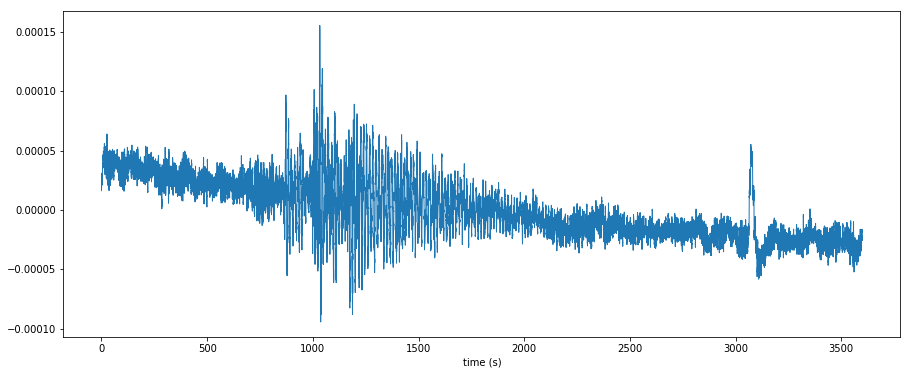

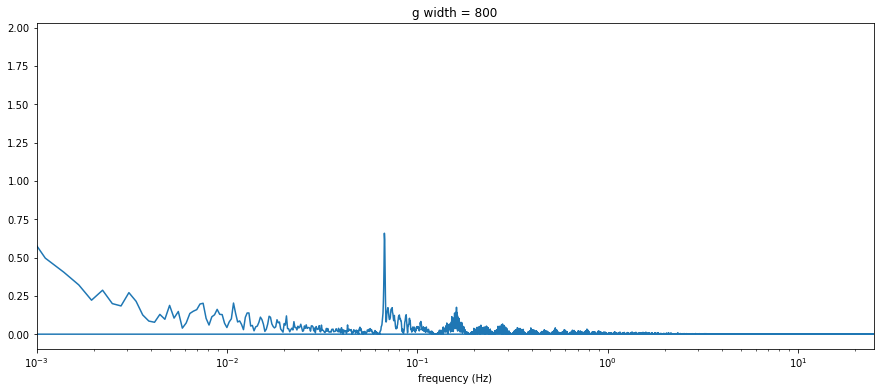

In [48]:
# parameters of window function (time domain)
Width_1 = 800
g_1 = np.ones(Width_1)
#g_1 = g_1 / len(g_1) # Normalization (optional)

h_1 = np.convolve(data,g_1,mode='same') # convolution
# "same" makes it so that the output is the same size as in1 (data here), centered with respect to the ‘full’ output.

# Fourier Transform
H_1 = fft.fft(h_1)

# plotting
plt.figure(figsize=(15,6)) 
plt.plot(t,h_1,linewidth=1) # plot of the seismogram convolved by a window of 10s long
plt.xlabel("time (s)")

plt.figure(figsize = (15,6))
plt.semilogx(f, np.abs(H_1))
plt.xlim((0.001,1./(2*dt)))
plt.xlabel("frequency (Hz)")
plt.title('g width = 800')

Text(0.5,1,'g width = 500')

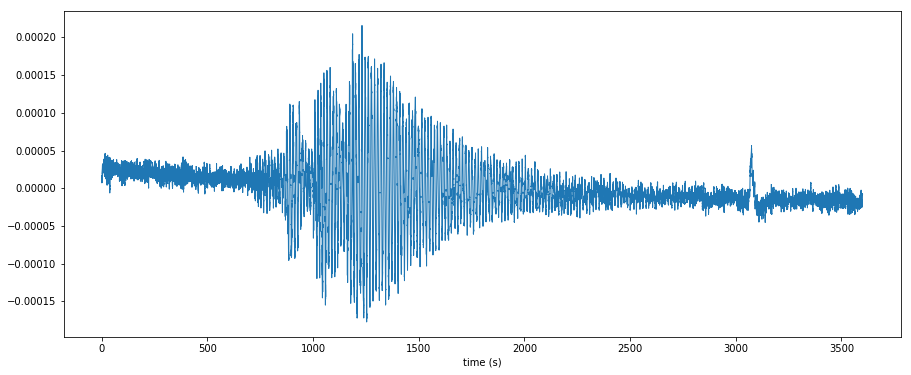

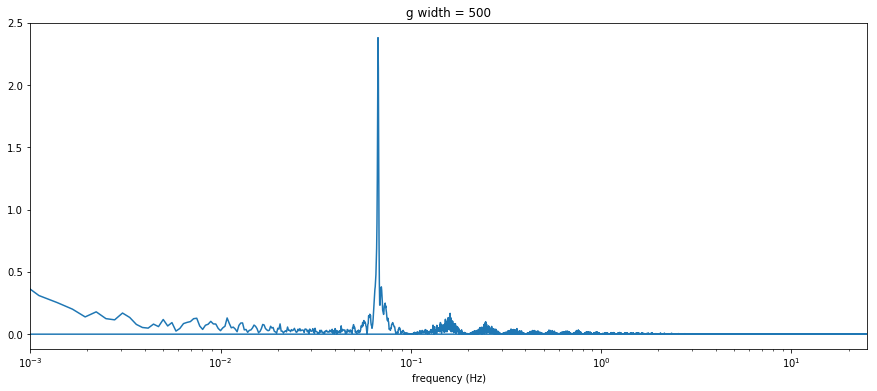

In [47]:
# parameters of window function
Width_2 = 500 # A vector of 500 elements all equal to 1 => A 10s long window function (dt*Width)
g_2 = np.ones(Width_2) # A vector of 500 elements all equal to 1 => A 10s long window function
#g_2 = g_2 / len(g_2)

h_2 = np.convolve(data,g_2,mode='same')

# Fourier Transform
H_2 = fft.fft(h_2)

# figure
plt.figure(figsize = (15,6))
plt.plot(t,h_2,linewidth=1) # plot of the seismogram convolved by a window of 10s long
plt.xlabel("time (s)")

plt.figure(figsize = (15,6))
plt.semilogx(f, np.abs(H_2))
plt.xlim((0.001,1./(2*dt)))
plt.xlabel("frequency (Hz)")
plt.title('g width = 500')